In [15]:
!pip install pandas
!pip install scikit-learn

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [19]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [20]:
print(df.shape)

(10000, 13)


In [21]:
print(df.duplicated().sum())

0


In [22]:
df.head()

,transaction_id,user_id,amount,transaction_type,device_type,location,time_of_day,transaction_hour,is_international,previous_transactions,failed_transactions,account_age_days,is_fraud
0,T00001,U255,43574.75,online,tablet,Singapore,morning,9,1,115,3,35,0
1,T00002,U661,104351.51,online,desktop,Singapore,night,1,1,15,4,598,1
2,T00003,U325,211864.52,POS,tablet,Dubai,afternoon,13,1,135,10,550,1
3,T00004,U327,280370.03,online,tablet,Kolkata,afternoon,15,0,129,10,42,1
4,T00005,U143,216222.76,online,desktop,Delhi,evening,17,0,11,1,791,0


In [23]:
!pip install matplotlib

In [25]:
import matplotlib.pyplot as plt
df['is_fraud'].value_counts()

is_fraud
1    5628
0    4372
Name: count, dtype: int64

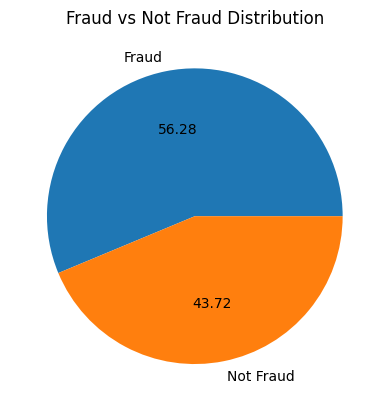

In [28]:
plt.title("Fraud vs Not Fraud Distribution")
plt.pie(df['is_fraud'].value_counts(),labels=['Fraud','Not Fraud'], autopct="%0.2f")
plt.show()

In [29]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'transaction_type',
       'device_type', 'location', 'time_of_day', 'transaction_hour',
       'is_international', 'previous_transactions', 'failed_transactions',
       'account_age_days', 'is_fraud'],
      dtype='object')

In [30]:
list(df.columns)

['transaction_id',
 'user_id',
 'amount',
 'transaction_type',
 'device_type',
 'location',
 'time_of_day',
 'transaction_hour',
 'is_international',
 'previous_transactions',
 'failed_transactions',
 'account_age_days',
 'is_fraud']

In [31]:
!pip install seaborn
import seaborn as sns

<Axes: xlabel='transaction_hour', ylabel='Count'>

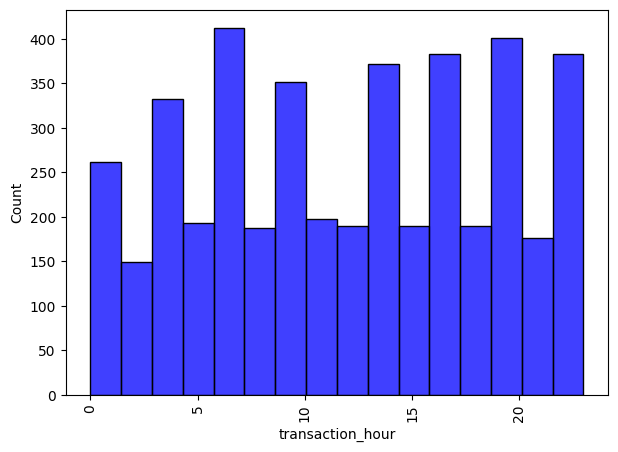

In [86]:
plt.figure(figsize = (7,5))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 0]['transaction_hour'],color='blue')

<Axes: xlabel='transaction_hour', ylabel='Count'>

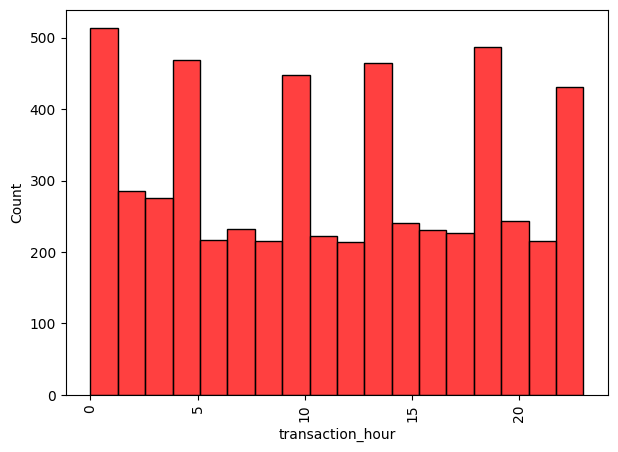

In [87]:
plt.figure(figsize = (7,5))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 1]['transaction_hour'],color='red')

<Axes: xlabel='location', ylabel='Count'>

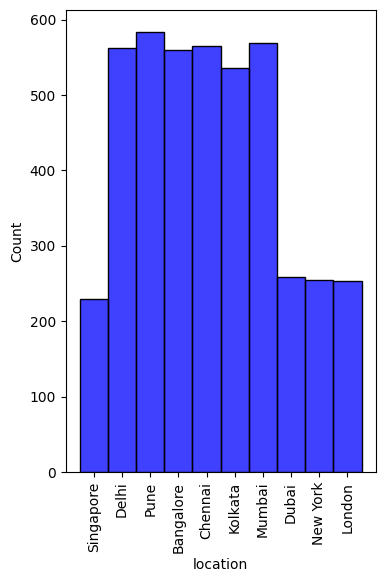

In [82]:
plt.figure(figsize = (4,6))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 0]['location'],color='blue')

<Axes: xlabel='location', ylabel='Count'>

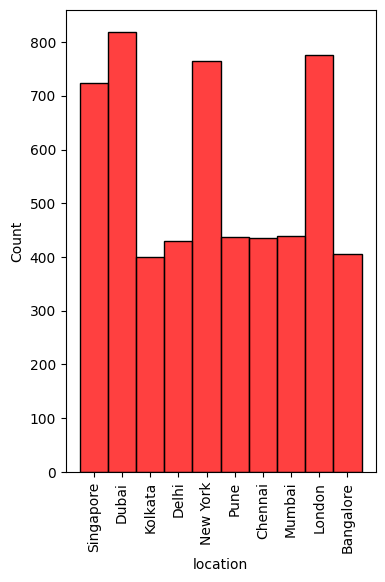

In [81]:
plt.figure(figsize = (4,6))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 1]['location'],color='red')

In [114]:
fraud_df = df[df['is_fraud'] == 1] #Filters only fraud hours
fraud_df[['amount','transaction_hour','is_fraud']]

,amount,transaction_hour,is_fraud
1,104351.51,1,1
2,211864.52,13,1
3,280370.03,15,1
7,79802.98,19,1
10,211166.34,21,1
...,...,...,...
9991,224192.10,8,1
9992,9706.03,3,1
9995,118355.73,23,1
9996,126545.76,6,1


In [116]:
fraud_df_1 = df[df['is_fraud'] == 0] #Filters only Non-Fraud hours
fraud_df_1[['amount','transaction_hour','is_fraud']]

,amount,transaction_hour,is_fraud
0,43574.75,9,0
4,216222.76,17,0
5,156210.96,15,0
6,139215.46,4,0
8,60807.93,10,0
...,...,...,...
9989,22519.77,1,0
9993,5291.13,12,0
9994,221462.31,15,0
9997,8905.02,23,0


In [117]:
top_hours_1 = (
    fraud_df_1['transaction_hour'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(int,top_hours_1.index))
l2 = list(map(int,top_hours_1.values))

Final_Top_Hours_1 = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})

Final_Top_Hours_1

,Transaction-Hour,No. of Transactions
0,20,218
1,7,216
2,22,202
3,16,200
4,11,198
5,6,196
6,10,193
7,5,193
8,18,190
9,12,190


Text(0, 0.5, 'No. of Transactions')

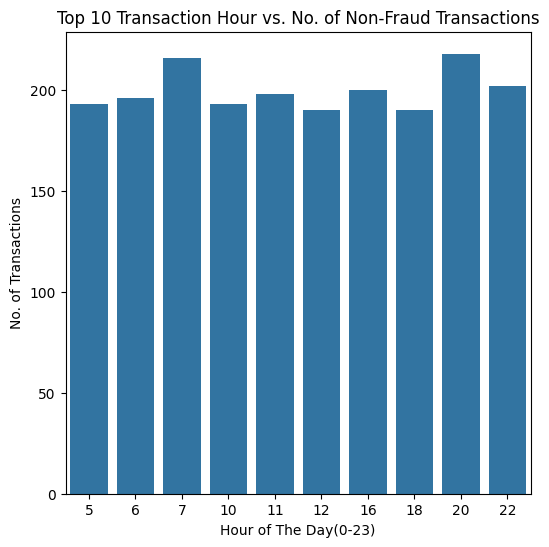

In [122]:
plt.figure(figsize=(6,6))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_1)
plt.title('Top 10 Transaction Hour vs. No. of Non-Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [130]:
top_hours_1_rev = (
    fraud_df_1['transaction_hour'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(int,top_hours_1_rev.index))
l2 = list(map(int,top_hours_1_rev.values))

Final_Top_Hours_1_rev = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})

Final_Top_Hours_1_rev

,Transaction-Hour,No. of Transactions
0,0,127
1,1,135
2,3,146
3,2,149
4,9,159


Text(0, 0.5, 'No. of Transactions')

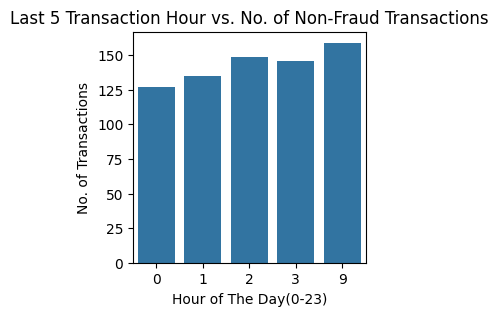

In [132]:
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_1_rev)
plt.title('Last 5 Transaction Hour vs. No. of Non-Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [115]:
top_hours = (
    fraud_df['transaction_hour'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(int,top_hours.index))
l2 = list(map(int,top_hours.values))
Final_Top_Hours = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})
print(Final_Top_Hours)

   Transaction-Hour  No. of Transactions
0                 2                  286
1                 3                  275
2                 1                  257
3                 0                  256
4                19                  254
5                20                  243
6                14                  242
7                15                  240
8                 5                  239
9                18                  233


Text(0, 0.5, 'No. of Transactions')

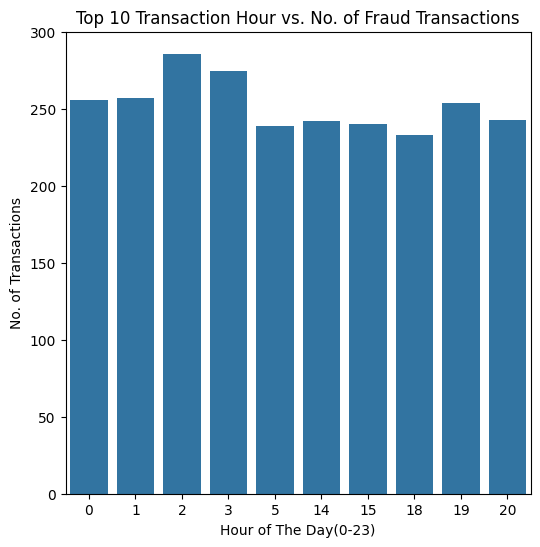

In [121]:
plt.figure(figsize=(6,6))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours)
plt.title('Top 10 Transaction Hour vs. No. of Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [124]:
top_hours_rev = (
    fraud_df['transaction_hour'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(int,top_hours_rev.index))
l2 = list(map(int,top_hours_rev.values))
Final_Top_Hours_rev = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})
print(Final_Top_Hours_rev)

   Transaction-Hour  No. of Transactions
0                22                  205
1                12                  214
2                 8                  215
3                21                  216
4                 6                  217


Text(0, 0.5, 'No. of Transactions')

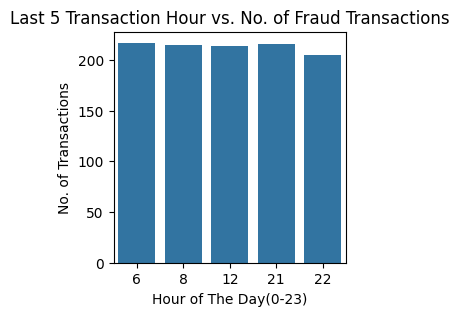

In [129]:
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_rev)
plt.title('Last 5 Transaction Hour vs. No. of Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [133]:
#Model Building